# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sbn


try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,children,no_debt,debt,ratio_%
0,0,13028,1063,7.543822
1,1,4364,444,9.234609
2,2,1858,194,9.454191
3,3,303,27,8.181818
4,4,37,4,9.756098
5,5,9,0,0.000000


[Text(0.5, 1.0, 'Влияние количества детей')]

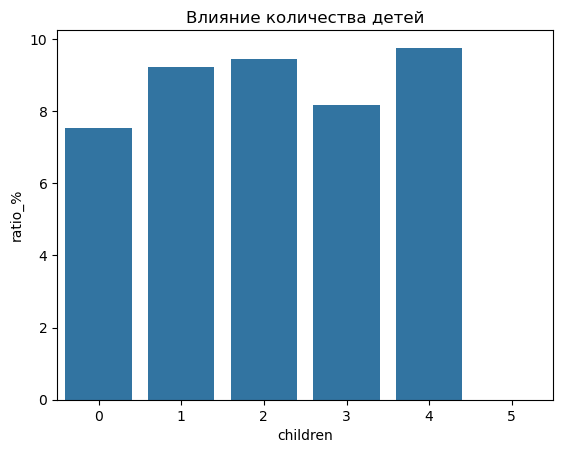

In [22]:
#display(data['children'].value_counts()) #группировка по количеству детей
#display(data.groupby('children')['debt'].sum()) #количество должников в каждой категориальной группе по количеству детей
#display((data.groupby('children')['debt'].sum() / data['children'].value_counts()).map('{:.2%}'.format))# процент должников в каждой группе по количеству детей

children_data_pivot = data.pivot_table(index=['children'], columns='debt', values='purpose_category', aggfunc='count') #создание сводной таблицы,  
#индексы строк которой -  уникальные значения столбца 'children', колонки - своевременность отдачи кредита, подсчет количеста значений - из колонки 'purpose_category'

children_data_pivot =  children_data_pivot.fillna(0)   # заполнение пропуска нулем
children_data_pivot = children_data_pivot.reset_index()    # сброс мультииндексов
children_data_pivot.columns = ['children', 'no_debt', 'debt'] # переименовываем название колонок в более понятные
children_data_pivot['ratio_%'] = (children_data_pivot['debt'] / (children_data_pivot['debt'] + children_data_pivot['no_debt'])) *100 # добавляем столбец с долей должников в %
children_data_pivot['debt'] = children_data_pivot['debt'].astype('int')    # переводим в цельночисленный формат 
children_data_pivot['no_debt'] = children_data_pivot['no_debt'].astype('int') # переводим в цельночисленный формат

display(children_data_pivot) # вывод итоговой сводной таблицы зависимости кредитоплатежеспособности от количества детей
sbn.barplot(x='children',y='ratio_%', data = children_data_pivot).set( 
    title="Влияние количества детей")  # столбчатая диаграмма зависимости кредитоплатежеспособности от количества детей Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 

Прослеживается небольшое различие между бездетными и заемщиками с детьми, если исключить слишком частную вборку в случае 5 детей, в которой вообще нет должников. Бездетные заемщики имеют просроченные задолженности примерно на 2% реже, чем заемщики с детьми, практически независимо от количества. Сложно предположить, с чем это связано, но, возможно, наличие детей дает какие-то поблажки в случае общения с приставами.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,no_debt,debt,ratio_%
0,Не женат / не замужем,2523,273,9.763948
1,в разводе,1105,84,7.064760
2,вдовец / вдова,888,63,6.624606
3,гражданский брак,3749,385,9.313014
4,женат / замужем,11334,927,7.560558


[Text(0.5, 1.0, 'Влияние семейного статуса')]

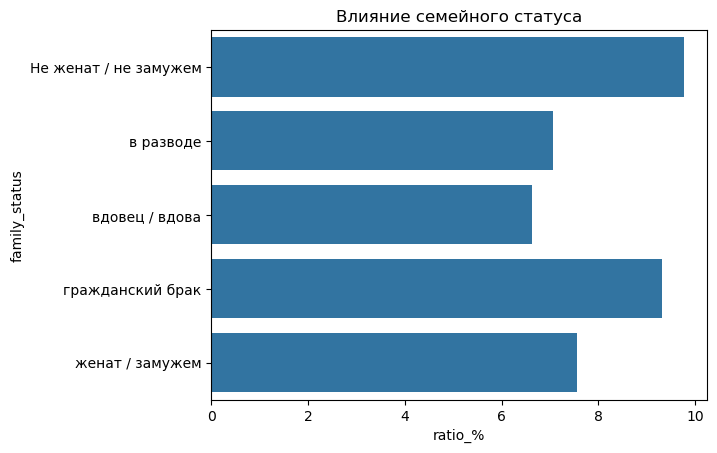

In [23]:
family_data_pivot = data.pivot_table(index=['family_status'], columns='debt', values='purpose_category', aggfunc='count').reset_index()
family_data_pivot.columns = ['family_status', 'no_debt', 'debt'] #переименование столбцов сводной таблицы

#добавление столбца с долей должников
family_data_pivot['ratio_%'] = (family_data_pivot['debt'] / (family_data_pivot['debt'] + family_data_pivot['no_debt'])) *100 
display(family_data_pivot.head(10))
#вывод столбчатой диаграммы зависимости между семейным положением и возвратом кредита в срок
sbn.barplot(x='ratio_%',y='family_status', data = family_data_pivot).set( 
    title="Влияние семейного статуса") 

**Вывод:** 

Клиенты, не состоящие в браке и состоящие в неофициальных отношениях, на 2-3% чаще имеют задолженности по кредитам, чем состоящие или состоявшие в официальных отношениях. Возможно, это как-то отражает корреляцию отношения к социальным институтам.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category,no_debt,debt,ratio_%
1000001+,A,23,2,8.00
200001-1000000,B,4660,354,7.06
50001-200000,C,14568,1353,8.50
30001-50000,D,328,21,6.02
0-30000,E,20,2,9.09


[Text(0.5, 1.0, 'Влияние уровня дохода')]

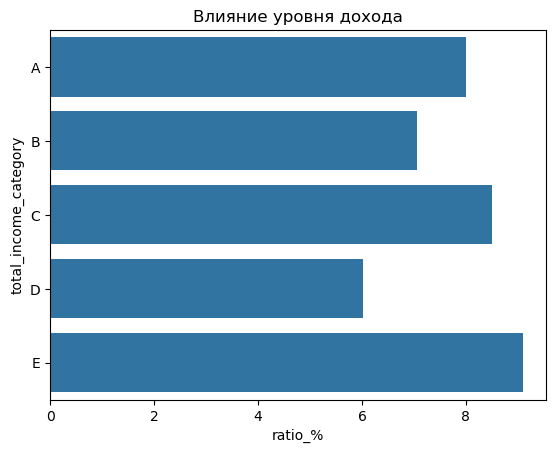

In [24]:
overall_income_groups = data['total_income_category'].value_counts().sort_index()
debt_income_groups = data.groupby('total_income_category')['debt'].sum().sort_index()

income_data_pivot = data.pivot_table(index=['total_income_category'], columns='debt', values='purpose_category', aggfunc='count').reset_index()
income_data_pivot.columns = ['total_income_category', 'no_debt', 'debt']
income_data_pivot['ratio_%'] = ((income_data_pivot['debt'] / (income_data_pivot['debt'] + income_data_pivot['no_debt'])) *100).map("{:.2f}".format)

income_data_pivot.rename(index={0:'1000001+', 1:'200001-1000000', 2:'50001-200000', 3:'30001-50000', 4:'0-30000'}, inplace=True)
display(income_data_pivot.head(10))

income_data_pivot['ratio_%'] = ((income_data_pivot['debt'] / (income_data_pivot['debt'] + income_data_pivot['no_debt'])) *100)
sbn.barplot(y='total_income_category',x='ratio_%', data = income_data_pivot).set( 
    title="Влияние уровня дохода")# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 

Сложно делать выводы в случае категорий с самыми низкими и самыми высокими доходами из-за недостаточной выборки. из оставшихся трех групп самый высокий процент невозврата у заемщиком со средним доходом(8,5%), а самый низкий - у заемщиков с доходом ниже среднего(6%). Возможно, это просто гауссово распределение.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,purpose_category,no_debt,debt,ratio_%
0,операции с автомобилем,3879,400,9.35
1,операции с недвижимостью,9971,780,7.26
2,получение образования,3619,369,9.25
3,проведение свадьбы,2130,183,7.91


[Text(0.5, 1.0, 'Влияние цели кредита')]

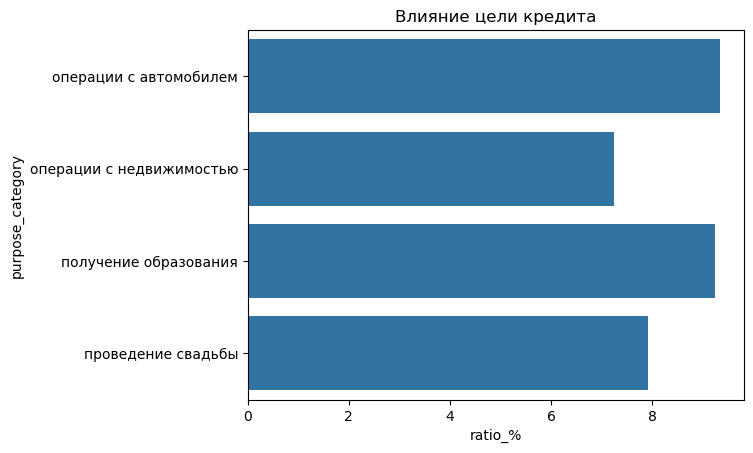

In [25]:
overall_purpose_groups = data['purpose_category'].value_counts().sort_index()
debt_purpose_groups = data.groupby('purpose_category')['debt'].sum().sort_index()

purpose_data_pivot = data.pivot_table(index=['purpose_category'], columns='debt', values='family_status_id', aggfunc='count').reset_index()
purpose_data_pivot.columns = ['purpose_category', 'no_debt', 'debt']
purpose_data_pivot['ratio_%'] = ((purpose_data_pivot['debt'] / (purpose_data_pivot['debt'] + purpose_data_pivot['no_debt'])) *100).map("{:.2f}".format)
display(purpose_data_pivot.head(10))

purpose_data_pivot['ratio_%'] = ((purpose_data_pivot['debt'] / (purpose_data_pivot['debt'] + purpose_data_pivot['no_debt'])) *100)
sbn.barplot(x='ratio_%',y='purpose_category', data = purpose_data_pivot).set( 
    title="Влияние цели кредита")# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 

Все выборки достаточно объемные.
Просрочек меньше всего в случае займов на недвижимость (7,26 %) и на свадьбу (7,91 %). В случае недвижимости слишком высок риск оказаться без объекта залога, а в случае свадьбы кредит, возможно, досрочно гасится из суммы подарков гостей.
Клиенты, берущие кредиты на автомобиль(9.35) или образование(9.25), возвращают долг реже.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Пропуски находятся в столбцах days_employed и total_income, в количестве чуть меньше 10% от общего числа заемщиков.
Видимой корреляции с определенной группой заемщиков не наблюдается. Пропуски могли возникнуть при заполнении данных или при переносе данных в базы работниками кредитного отдела.


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Среди выборки из количественных переменных могут попадаться аномально большие или малые значения, которые сильно смещают значение среднего, но практически не влияют на медианное

### Шаг 4: общий вывод.

В работе были проанализированы данные о заемщиках банка в части уровня их дохода, количества детей, семейного статуса и целей взятия кредита. В изначальной таблице данных был выявлен и обработан высокий процент пропущенных и аномальных значений в столбце стаж 'days_employed' и 'total_income'. Скорее всего, он вычисляется автоматически при заполнее дат трудовой деятельности, необходимо при заполнении формы установить правило на формат введения данных, чтобы исключить или минимизировать некорректно заполенные ячейки. На основании одинакого количества пропусков в столбцах стажа и дохода можно предположить, что их заполнение взаимосвязано, что нарушает структуру данных, так как информация об уровне дохода является ключевой для оценки риска возникновения долга, тогда как данные трудового стажа не играют определяющей роли.

Для оценки влияния различных факторов на риск возникновения долга по займу были оценены зависимости процента должников от количества детей, уровня дохода, семейного статуса и целей кредита.

Установлено, что отсутствие детей немного снижает риск возникновения долга: для заемщиков с 1-3 детьми уровень должников одинаковый. При этом в выборке представлены немногочисленные данные по заемщикам из многодетных семей, что не позволяет установить, каким будет выполнение долговых обязательств для этой категории заемщиков. Необходимо дополнить выборку заемщиками с количеством детей от 4-х и более для более точной проверки.

Выявлено, что семейный опыт благополучно влияет на экономическое поведение заемщиков: доля долгов среди женатых/замужних и разведенных людей ниже, чем у холостых, при этом наиболее низкий процент должников среди вдов/вдовцов, вероятно, ввиду более зрелого возраста, отвественного отношения к финансам и более стабильного уровня доходов.

По целям кредита наиболее низкий риск возникновения задолженностей среди кредитов - на недвижимость, что, скорее всего, связано с более осознанным принятием решения о дорогой покупке, а также с более детальной проверкой заемщиков перед выдачей кредита на приобретение недвижимости, высокими штрафными санкциями в случае просрочки данного типа кредита. Также наиболее низкая доля долгов - в случае кредитов на проведение свадеб, что, скорее всего, связано с небольшими суммами на проведение этого мероприятия. Наиболее высокий риск возникновения долга среди кредитов - на образование и автомобили, что, предположительно, связано с нестабильным уровнем дохода заемщиков, а также низким порогом проверки заемщиков для получения данного вида кредитов.

Проведя изучение, предпоготовку и исследование данных по платежеспособности клиентов банка, в основном новоосвоенными средствами pandas, такими как группировка, аггрегация, сводные таблицы и т.п. При этом мы получили следующие данные:

  Более ответственные заемщики:

- `по количеству детей` - бездетные (7,54%);
- `по семейному положению` - разведенные (7,06%) и овдовевшие (6,62 %);
- `по уровню дохода` - с доходом ниже среднего (6,02 %);
- `по цели кредита` - недвижимость (7,26 %) и свадьба (7,91 %);
.

  Менее ответственные заемщики:

- `по количеству детей` - с детьми (~9,3%).Конкретное количество детей большой роли не играет;
- `по семейному положению` - живущие в гражданском браке (9,31%), либо не состоящие в браке (9,76%);
- `по уровню дохода` - со средним (8,5%) доходом;
- `по цели кредита` - получение образования (9,25 %) или приобретение автомобиля (9,35 %).

Идеальный заемщик по этим факторам - это клиент в разводе, либо вдовец / вдова, либо состоящий в официальном браке, без детей, с доходом ниже среднего или высоким, который берет кредит либо на свадьбу, либо на операции с недвижимостью.

Самый же ненадежный умозрительный заемщик - это клиент, не состоящий в официальном браке, либо состоящий в гражданском браке, имеющий 1-2 детей, доход - средний или выше среднего, который берет кредит на образование или покупку автомобиля.

Различия в платежеспособности различных групп довольно незначительны и могут иметь под собой множество причин, порой нетривиальных. Большое количество пропусков также могло исказить результат анализа. Для более точного определения вероятности невозврата долга, необходимо изучать данные клиента на более глубоком исследовании, проверив данные на зависимости различных факторов в совокупности, а не по отдельности.